## The One-Bit "Black Box" Problem (Deutsch-Jozsa)
---

Suppose we have an unknown "black box" function that takes a single bit (either '1' or '0') as input and outputs a single bit. Our goal is to determine whether or not the function is constant or varies with its input.

Let this function be $f : \{ 0, 1 \} \rightarrow \{0, 1\}$.

There are up to four distinct possibilities for $f$, two of which are constant and two of which are non-constant. If we run $f$ on a classical computer, we must evaluate $f$ a total of two times to know if it is constant (i.e. compute $f(0)$ and $f(1)$ and compare the results).

If we run $f$ on a quantum computer, it turns out that we only need to perform **one evaluation** of $f$ to know if it is constant or non-constant!

In [1]:
#Dependencies
import numpy as np
from qiskit import *
%matplotlib inline

Black Box Function:
black_box(0) = 1
black_box(1) = 1


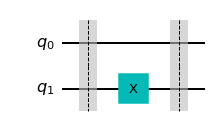

In [15]:
#---------------------------#
# "black box" function:
def black_box(x):
    return 1
#---------------------------#

# compile the blackbox function into a quantum circuit:
bb_circ = QuantumCircuit(2)
bb_circ.barrier()
if black_box(True) != black_box(False):
    bb_circ.cx(0,1)
if black_box(True):
    bb_circ.x(1)
bb_circ.barrier()
    
# print & draw the black box circuit:
print('Black Box Function:')
print(f'black_box(0) = {int(black_box(False))}')
print(f'black_box(1) = {int(black_box(True))}')
bb_circ.draw('mpl')

Deutsch Oracle Circuit:


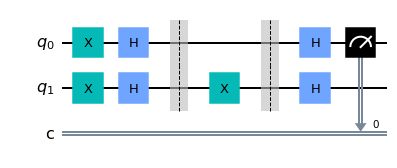

In [16]:
# Compose black box with a Deutsch Oracle: 
pre_circ = QuantumCircuit(2)
pre_circ.x([0,1])
pre_circ.h([0,1])
pre_circ.draw('mpl')

post_circ = QuantumCircuit(2,1)
post_circ.h([0,1])
post_circ.measure(0,0)

deutsch_circ = pre_circ + bb_circ + post_circ
print('Deutsch Oracle Circuit:')
deutsch_circ.draw('mpl')

In [17]:
# Import the Aer backend qasm simulator:
from qiskit import Aer
backend_sim = Aer.get_backend('qasm_simulator')

# simulate the circuit:
job_sim = execute(deutsch_circ, backend_sim, shots=1)

counts = job_sim.result().get_counts()
print('Simulation results:')
print(counts)
print('\nThe observed outcome was the value ' + list(counts.keys())[0])

if '0' in counts:
    print('\n(This result means the "black box" is a NON-CONSTANT function)')
if '1' in counts:
    print('\n(This result mens the "black box" is a CONSTANT function)')

Simulation results:
{'1': 1}

The observed outcome was the value 1

(This result mens the "black box" is a CONSTANT function)


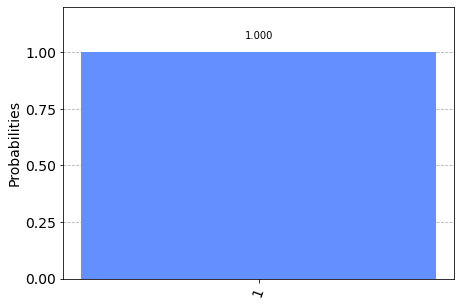

In [14]:
from qiskit.visualization import plot_histogram

# plot a histogram of the outcome:
plot_histogram(counts)